In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('./Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [11]:
N = 700  # Total number of rounds (users visiting the website)
d = 10  # Number of ads (arms of the bandit)
ads_selected = []  # List to store the index of the selected ad in each round
numbers_of_selection = [0] * d  # Number of times each ad has been selected
sums_of_rewards = [0] * d  # Sum of rewards for each ad
total_reward = 0  # Total reward accumulated

for n in range(0, N):
    ad = 0  # Initialize the selected ad for this round
    max_upper_bound = 0  # Initialize the maximum upper confidence bound
    for i in range(0, d):  # Iterate over all ads
        if numbers_of_selection[i] > 0:  # If the ad has been selected at least once
            average_reward = sums_of_rewards[i] / numbers_of_selection[i]  # Calculate the average reward
            delta_i = math.sqrt(3 / 2 * math.log(n + 1) / numbers_of_selection[i])  # Calculate the confidence interval
            upper_bound = average_reward + delta_i  # Calculate the upper confidence bound
        else:
            upper_bound = 1e4000  # Assign a very high value to ensure the ad is selected at least once
        if upper_bound > max_upper_bound:  # Update the ad with the highest upper bound
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)  # Record the selected ad
    numbers_of_selection[ad] += 1  # Increment the count of selections for the selected ad
    reward = dataset.values[n, ad]  # Get the reward for the selected ad
    sums_of_rewards[ad] += reward  # Update the sum of rewards for the selected ad
    total_reward += reward  # Update the total reward

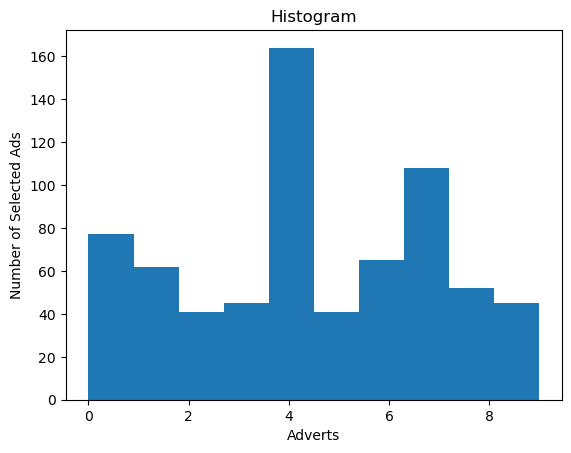

In [12]:
plt.hist(ads_selected)
plt.title('Histogram')
plt.xlabel('Adverts')
plt.ylabel('Number of Selected Ads')
plt.show()

# More Elegant Code

In [ ]:
import numpy as np

# Initialize variables
numbers_of_selection = np.zeros(d)
sums_of_rewards = np.zeros(d)
ads_selected = []
total_reward = 0

for n in range(N):
    if n < d:
        ad = n  # Ensure each ad is selected at least once
    else:
        average_rewards = sums_of_rewards / np.maximum(numbers_of_selection, 1)
        delta = np.sqrt(3 / 2 * np.log(n + 1) / np.maximum(numbers_of_selection, 1))
        upper_bounds = average_rewards + delta
        ad = np.argmax(upper_bounds)
    
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward